In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkb, wkt
from shapely.geometry import box, Polygon

import rasterio
import rioxarray as rxa

import matplotlib.pyplot as plt

from datetime import datetime

from metloom.pointdata import SnotelPointData, CDECPointData
from metloom.variables import SnotelVariables, CdecStationVariables

fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/snotels')

uavsar_dir = Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar')

uavsars = list(uavsar_dir.glob('*'))
uavsars = [u for u in uavsars if u != 'tmp']
uavsars = {u: list(u.glob('*.cor.grd.tiff'))[0] for u in uavsars if len(list(u.glob('*.cor.grd.tiff'))) > 0}
uavsars = {u: vectorize_valid(v) for u, v in uavsars.items()}

In [ ]:
uavsars

In [2]:
from rasterio import features
def vectorize_valid(fp):
    img = rxa.open_rasterio(fp).squeeze('band')
    img = ~img.isnull()
    img = img.astype('uint8')
    mask = img == 1
    return Polygon(list((features.shapes(img, mask = mask)))[0][0]['coordinates'][0])

<Axes: >

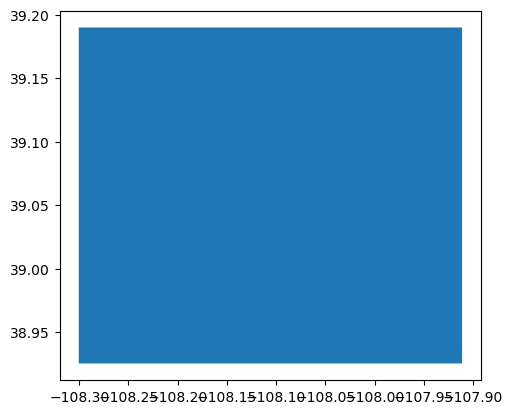

In [2]:
img = rxa.open_rasterio(list(uavsars.values())[0]).squeeze('band')
img = ~img.isnull()

from geocube.api.core import make_geocube
from geocube.vector import vectorize

grid_gdf = vectorize(img.astype('int32'))
grid_gdf.plot()

In [ ]:
img.plot()